:


# **Initiate and Configure Spark**

---


In [ ]:
!pip install pyspark

In [ ]:
import pyspark
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder.master("local[2]").appName("UK_Crime_Cases_").getOrCreate()

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:46053)
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/py4j/java_gateway.py", line 977, in _get_connection
    connection = self.deque.pop()
IndexError: pop from an empty deque

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/py4j/java_gateway.py", line 1115, in start
    self.socket.connect((self.address, self.port))
ConnectionRefusedError: [Errno 111] Connection refused


Py4JNetworkError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Note: If you want to work with RDD, you should use: "from pyspark import SparkContext, SparkConf"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



# **Load Data**

---


In [ ]:
# Load Data
LSOA = spark.read.load("/content/drive/MyDrive/Colab Notebooks/Big Data Datasets/Population Data by LSOA.csv", format="csv", inferSchema=True, header=True)
df2 = spark.read.load("/content/drive/MyDrive/Colab Notebooks/Big Data Datasets/all_crimes18_hdr.txt.gz", format="csv", inferSchema=True, header=True)
#df2 = spark.read.load("/content/drive/MyDrive/Colab Notebooks/SparkSQL/02-15-2018.csv", format="csv", inferSchema=True, header=True)


In [ ]:
LSOA.show(5)

+----+---------------+--------------+-----------+----------------------------------------------+--------------------------------+----------------------------------+-----------------------------------------------+------------------------------------------------------------+----------------------------------------------------------------------------------------------------------+------------------------------------------+------------------------------------------------------------------+
|date|      geography|geography code|Rural Urban|Variable: All usual residents; measures: Value|Variable: Males; measures: Value|Variable: Females; measures: Value|Variable: Lives in a household; measures: Value|Variable: Lives in a communal establishment; measures: Value|Variable: Schoolchild or full-time student aged 4 and over at their non term-time address; measures: Value|Variable: Area (Hectares); measures: Value|Variable: Density (number of persons per hectare); measures: Value|
+----+------------

# **Data Extraction and Filtering System running, test and diagnostics** 

In [ ]:
df2.show(5)

+--------+-------+--------------------+--------------------+---------+---------+--------------------+---------+--------------------+--------------------+---------------------+-------+
|Crime ID|  Month|         Reported by|        Falls within|Longitude| Latitude|            Location|LSOA code|           LSOA name|          Crime type|Last outcome category|Context|
+--------+-------+--------------------+--------------------+---------+---------+--------------------+---------+--------------------+--------------------+---------------------+-------+
|    null|2010-12|Avon and Somerset...|Avon and Somerset...|  -0.8056|51.819143|On or near Norfol...|E01017662| Aylesbury Vale 015C|         Other crime|                 null|   null|
|    null|2010-12|Avon and Somerset...|Avon and Somerset...|-2.494366|51.418169|On or near Keynsh...|E01014399|Bath and North Ea...|Anti-social behav...|                 null|   null|
|    null|2010-12|Avon and Somerset...|Avon and Somerset...|-2.511927|51.409435|

In [ ]:
df2 = df2.drop('Crime ID','Last outcome category','Context')

In [ ]:
df2.show(5)

+-------+--------------------+--------------------+---------+---------+--------------------+---------+--------------------+--------------------+
|  Month|         Reported by|        Falls within|Longitude| Latitude|            Location|LSOA code|           LSOA name|          Crime type|
+-------+--------------------+--------------------+---------+---------+--------------------+---------+--------------------+--------------------+
|2010-12|Avon and Somerset...|Avon and Somerset...|  -0.8056|51.819143|On or near Norfol...|E01017662| Aylesbury Vale 015C|         Other crime|
|2010-12|Avon and Somerset...|Avon and Somerset...|-2.494366|51.418169|On or near Keynsh...|E01014399|Bath and North Ea...|Anti-social behav...|
|2010-12|Avon and Somerset...|Avon and Somerset...|-2.511927|51.409435|On or near Harlec...|E01014399|Bath and North Ea...|Anti-social behav...|
|2010-12|Avon and Somerset...|Avon and Somerset...|-2.511571|51.414895|On or near Orchar...|E01014399|Bath and North Ea...|Anti-so

In [ ]:
print('Columns', df2.columns)
print('Total number of columns', len(df2.columns))

# Printing the details of the dataset (all_crimes)

Columns ['Month', 'Reported by', 'Falls within', 'Longitude', 'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type']
Total number of columns 9


In [ ]:
LSOA = LSOA.drop('date','Rural Urban')

In [ ]:
LSOA.show(5)

+---------------+--------------+----------------------------------------------+--------------------------------+----------------------------------+-----------------------------------------------+------------------------------------------------------------+----------------------------------------------------------------------------------------------------------+------------------------------------------+------------------------------------------------------------------+
|      geography|geography code|Variable: All usual residents; measures: Value|Variable: Males; measures: Value|Variable: Females; measures: Value|Variable: Lives in a household; measures: Value|Variable: Lives in a communal establishment; measures: Value|Variable: Schoolchild or full-time student aged 4 and over at their non term-time address; measures: Value|Variable: Area (Hectares); measures: Value|Variable: Density (number of persons per hectare); measures: Value|
+---------------+--------------+--------------------

In [ ]:
df2= df2.withColumnRenamed('LSOA code','geography code')

In [ ]:
print('Columns', LSOA.columns)
print('Total number of columns', len(LSOA.columns))

# Printing the details of the dataset (all_crimes)

Columns ['geography', 'geography code', 'Variable: All usual residents; measures: Value', 'Variable: Males; measures: Value', 'Variable: Females; measures: Value', 'Variable: Lives in a household; measures: Value', 'Variable: Lives in a communal establishment; measures: Value', 'Variable: Schoolchild or full-time student aged 4 and over at their non term-time address; measures: Value', 'Variable: Area (Hectares); measures: Value', 'Variable: Density (number of persons per hectare); measures: Value']
Total number of columns 10


In [ ]:
df2 = df2.join(LSOA, on=['geography code'], how='inner')

In [ ]:
df2.show(5)

+--------------+-------+--------------------+--------------------+---------+---------+--------------------+--------------------+--------------------+--------------------+----------------------------------------------+--------------------------------+----------------------------------+-----------------------------------------------+------------------------------------------------------------+----------------------------------------------------------------------------------------------------------+------------------------------------------+------------------------------------------------------------------+
|geography code|  Month|         Reported by|        Falls within|Longitude| Latitude|            Location|           LSOA name|          Crime type|           geography|Variable: All usual residents; measures: Value|Variable: Males; measures: Value|Variable: Females; measures: Value|Variable: Lives in a household; measures: Value|Variable: Lives in a communal establishment; measures: 

In [ ]:
print('Columns:',df2.columns)
print('Total Number of columns:', len(df2.columns))

Columns: ['geography code', 'Month', 'Reported by', 'Falls within', 'Longitude', 'Latitude', 'Location', 'LSOA name', 'Crime type', 'geography', 'Variable: All usual residents; measures: Value', 'Variable: Males; measures: Value', 'Variable: Females; measures: Value', 'Variable: Lives in a household; measures: Value', 'Variable: Lives in a communal establishment; measures: Value', 'Variable: Schoolchild or full-time student aged 4 and over at their non term-time address; measures: Value', 'Variable: Area (Hectares); measures: Value', 'Variable: Density (number of persons per hectare); measures: Value']
Total Number of columns: 18


# **Selection, application, and reasoning behind use of statistical analysis and multiple evaluation measures**

# **1.Violent Crime is Increasing**

In [ ]:

from functools import reduce
from pyspark.sql import DataFrame

# Create a list of dataframes


In [ ]:

df2.show(5)

+--------------+-------+--------------------+--------------------+---------+---------+--------------------+--------------------+--------------------+--------------------+----------------------------------------------+--------------------------------+----------------------------------+-----------------------------------------------+------------------------------------------------------------+----------------------------------------------------------------------------------------------------------+------------------------------------------+------------------------------------------------------------------+
|geography code|  Month|         Reported by|        Falls within|Longitude| Latitude|            Location|           LSOA name|          Crime type|           geography|Variable: All usual residents; measures: Value|Variable: Males; measures: Value|Variable: Females; measures: Value|Variable: Lives in a household; measures: Value|Variable: Lives in a communal establishment; measures: 

In [ ]:
df2.select('Crime type').groupBy('Crime type').count().show()

+--------------------+--------+
|          Crime type|   count|
+--------------------+--------+
|       Bicycle theft|  487065|
|        Public order| 1276371|
|               Drugs| 1099299|
|Public disorder a...|  234395|
|         Other crime| 2225706|
|             Robbery|  475336|
|Criminal damage a...| 3691036|
|Theft from the pe...|  461544|
|         Shoplifting| 2288563|
|            Burglary| 3316715|
|       Violent crime| 1605429|
|         Other theft| 3790366|
|Possession of wea...|  150450|
|Violence and sexu...| 5802735|
|       Vehicle crime| 2973060|
|Anti-social behav...|15391389|
+--------------------+--------+



In [ ]:
df2.select('Crime type').groupBy('Crime type').count().orderBy('count',ascending=False).show()

+--------------------+--------+
|          Crime type|   count|
+--------------------+--------+
|Anti-social behav...|15391389|
|Violence and sexu...| 5802735|
|         Other theft| 3790366|
|Criminal damage a...| 3691036|
|            Burglary| 3316715|
|       Vehicle crime| 2973060|
|         Shoplifting| 2288563|
|         Other crime| 2225706|
|       Violent crime| 1605429|
|        Public order| 1276371|
|               Drugs| 1099299|
|       Bicycle theft|  487065|
|             Robbery|  475336|
|Theft from the pe...|  461544|
|Public disorder a...|  234395|
|Possession of wea...|  150450|
+--------------------+--------+



In [ ]:
violent=df2.filter(df2['Crime type'] == "Violent crime")

In [ ]:
violent.show(truncate=False)

+--------------+-------+------------------------------+------------------------------+---------+---------+---------------------------------+---------------------------------+-------------+---------------------------------+----------------------------------------------+--------------------------------+----------------------------------+-----------------------------------------------+------------------------------------------------------------+----------------------------------------------------------------------------------------------------------+------------------------------------------+------------------------------------------------------------------+
|geography code|Month  |Reported by                   |Falls within                  |Longitude|Latitude |Location                         |LSOA name                        |Crime type   |geography                        |Variable: All usual residents; measures: Value|Variable: Males; measures: Value|Variable: Females; measures: Value

In [ ]:
v=violent.select('Month','Crime type').groupby('Month','Crime type').count().orderBy('count', ascending=False)

In [ ]:
violent1 = v.select('Month', 'Crime type','count')

In [ ]:
def barplot(df, col, lim=10, yname=None):
    
    '''
    This function makes a bar plot for the Spark dataframe df 
    for categorical column col only selecting top categories 
    as specified by lim. 
    '''
    
    # Grouping by the categories, counting on each categories 
    # and ordering them by the count
    classes = df.groupBy(col).count().orderBy('count', ascending=False)
    
    # Take first 'lim' number of rows and convert to pandas  
    pd_df = classes.limit(lim).toPandas()
    
    # Making plot 
    pd_df.plot(kind='bar', x=col, legend=False)
    plt.ylabel(yname)
    plt.show()

In [ ]:
violent.select('Month','Crime type').groupby('Month','Crime type').count().orderBy('count', ascending=False).show()

+-------+-------------+-----+
|  Month|   Crime type|count|
+-------+-------------+-----+
|2011-07|Violent crime|66301|
|2011-04|Violent crime|64060|
|2011-05|Violent crime|63409|
|2011-08|Violent crime|63058|
|2011-03|Violent crime|62264|
|2011-06|Violent crime|62243|
|2011-01|Violent crime|59776|
|2010-12|Violent crime|57517|
|2011-10|Violent crime|57159|
|2011-02|Violent crime|56624|
|2012-07|Violent crime|56332|
|2012-05|Violent crime|56242|
|2012-08|Violent crime|55449|
|2012-03|Violent crime|55292|
|2011-09|Violent crime|54254|
|2011-11|Violent crime|53623|
|2012-06|Violent crime|53555|
|2012-10|Violent crime|53311|
|2012-01|Violent crime|53078|
|2011-12|Violent crime|52959|
+-------+-------------+-----+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import year

from pyspark.sql.functions import to_date

 

df1 = violent.withColumn('Month',year(violent.Month))

df1.show()


+--------------+-----+--------------------+--------------------+---------+---------+--------------------+--------------------+-------------+--------------------+----------------------------------------------+--------------------------------+----------------------------------+-----------------------------------------------+------------------------------------------------------------+----------------------------------------------------------------------------------------------------------+------------------------------------------+------------------------------------------------------------------+
|geography code|Month|         Reported by|        Falls within|Longitude| Latitude|            Location|           LSOA name|   Crime type|           geography|Variable: All usual residents; measures: Value|Variable: Males; measures: Value|Variable: Females; measures: Value|Variable: Lives in a household; measures: Value|Variable: Lives in a communal establishment; measures: Value|Variable: Sc

In [ ]:
import matplotlib.pyplot as plt
def barplot(df, col, lim=10, yname=None):
    
    '''
    This function makes a bar plot for the Spark dataframe df 
    for categorical column col only selecting top categories 
    as specified by lim. 
    '''
    
    # Grouping by the categories, counting on each categories 
    # and ordering them by the count
    classes = df.groupBy(col).count().orderBy('count', ascending=False)
    
    # Take first 'lim' number of rows and convert to pandas  
    pd_df = classes.limit(lim).toPandas()
    
    # Making plot 
    pd_df.plot(kind='bar', x=col, legend=False)
    plt.ylabel(yname)
    plt.show()

In [ ]:
df1.select('Month').groupBy('Month').count().orderBy('count', ascending=False).show()

+-----+------+
|Month| count|
+-----+------+
| 2011|715730|
| 2012|635977|
| 2013|196205|
| 2010| 57517|
+-----+------+



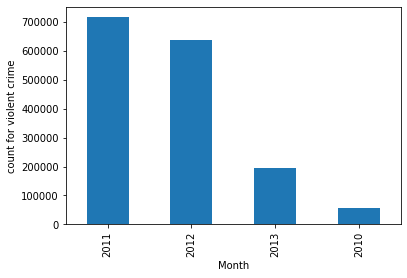

In [ ]:
barplot(df1, 'Month', yname='count for violent crime')

###Violent crime is increasing from 2010 to 2011 ,then reduced after 2011 .In 2010, overall count for violent crime was 57517,in 2011 it increased to 715730, But in 2012 it got reduced to 635977. In 2013, again reduced to 196205.
### As per the dataset, violent crime is decreasing. so Iam not agree with Ross kemp's  first claim and it seems wrong.

#**2.	There are more firearms incidents per head in Birmingham than anywhere else in the UK**

In [ ]:
f1=df2.filter((df2['Crime type'] == "Violent crime"))

In [ ]:
f1.show(truncate=False)

+--------------+-------+------------------------------+------------------------------+---------+---------+---------------------------------+---------------------------------+-------------+---------------------------------+----------------------------------------------+--------------------------------+----------------------------------+-----------------------------------------------+------------------------------------------------------------+----------------------------------------------------------------------------------------------------------+------------------------------------------+------------------------------------------------------------------+
|geography code|Month  |Reported by                   |Falls within                  |Longitude|Latitude |Location                         |LSOA name                        |Crime type   |geography                        |Variable: All usual residents; measures: Value|Variable: Males; measures: Value|Variable: Females; measures: Value

In [ ]:
f2=f1.select('Crime type','Location','Variable: All usual residents; measures: Value').groupby('Crime type','Location','Variable: All usual residents; measures: Value').count().orderBy('count', ascending=False)

In [ ]:
f2.show(truncate=False)

+-------------+-------------------------------+----------------------------------------------+-----+
|Crime type   |Location                       |Variable: All usual residents; measures: Value|count|
+-------------+-------------------------------+----------------------------------------------+-----+
|Violent crime|On or near Nightclub           |1972                                          |514  |
|Violent crime|On or near Shopping Area       |1020                                          |405  |
|Violent crime|On or near Prince Of Wales Road|1397                                          |404  |
|Violent crime|On or near Victoria            |1769                                          |367  |
|Violent crime|On or near Caroline Street     |1099                                          |332  |
|Violent crime|On or near Trinity Street      |1708                                          |331  |
|Violent crime|On or near Leeds               |1017                                        

In [ ]:
ratio=f2['count']/f2['Variable: All usual residents; measures: Value']

In [ ]:
f3=f2.withColumn("ratio",ratio)
f3.show()

+-------------+--------------------+----------------------------------------------+-----+-------------------+
|   Crime type|            Location|Variable: All usual residents; measures: Value|count|              ratio|
+-------------+--------------------+----------------------------------------------+-----+-------------------+
|Violent crime|On or near Nightclub|                                          1972|  514| 0.2606490872210953|
|Violent crime|On or near Shoppi...|                                          1020|  405|0.39705882352941174|
|Violent crime|On or near Prince...|                                          1397|  404|0.28919112383679313|
|Violent crime| On or near Victoria|                                          1769|  367|0.20746184284906727|
|Violent crime|On or near Caroli...|                                          1099|  332| 0.3020928116469518|
|Violent crime|On or near Trinit...|                                          1708|  331|0.19379391100702575|
|Violent c

In [ ]:
f33=f3.orderBy('ratio', ascending=False)
f33.show()

+-------------+--------------------+----------------------------------------------+-----+-------------------+
|   Crime type|            Location|Variable: All usual residents; measures: Value|count|              ratio|
+-------------+--------------------+----------------------------------------------+-----+-------------------+
|Violent crime|On or near Shoppi...|                                          1020|  405|0.39705882352941174|
|Violent crime|    On or near Leeds|                                          1017|  320|0.31465093411996065|
|Violent crime|On or near Caroli...|                                          1099|  332| 0.3020928116469518|
|Violent crime|On or near Prince...|                                          1397|  404|0.28919112383679313|
|Violent crime|On or near Nightclub|                                          1972|  514| 0.2606490872210953|
|Violent crime|On or near Liverp...|                                          1044|  256|0.24521072796934865|
|Violent c

###Since there is no firearms incident category under crime type we assume firearms incident will come under 'violent crime' category . for finding the per head count , we took the count for people those who commited crime and divided by the total number of residents in corresponding location . So we got a ratio. Then we find out the location corresponding to the maximum ratio. From the results, it is evident that the firearms incidents per head is more On or near shopping area(ratio:0.397) . Now we have to check the corresponding geographyical details for the location specified.

In [ ]:
df2.filter((df2['Crime type'] == "Violent crime")&(df2['Location']=="On or near Shopping Area")&(df2['geography']=='Birmingham 138A')).show()

+--------------+-------+--------------------+--------------------+---------+---------+--------------------+---------------+-------------+---------------+----------------------------------------------+--------------------------------+----------------------------------+-----------------------------------------------+------------------------------------------------------------+----------------------------------------------------------------------------------------------------------+------------------------------------------+------------------------------------------------------------------+
|geography code|  Month|         Reported by|        Falls within|Longitude| Latitude|            Location|      LSOA name|   Crime type|      geography|Variable: All usual residents; measures: Value|Variable: Males; measures: Value|Variable: Females; measures: Value|Variable: Lives in a household; measures: Value|Variable: Lives in a communal establishment; measures: Value|Variable: Schoolchild or ful

### From the results, it is evident that the shopping are is in BIrmingham 138A in UK. So second claim seems true, there are more firarm incidents in birmingham UK. 

# **3.	Crimes involving firearms are closely associated with drugs offences**



In [ ]:

D1=df2.filter((df2['Crime type'] == "Drugs"))

In [ ]:
D1.show(truncate=False)

+--------------+-------+------------------------------+------------------------------+---------+---------+-----------------------------+---------------------------------+----------+---------------------------------+----------------------------------------------+--------------------------------+----------------------------------+-----------------------------------------------+------------------------------------------------------------+----------------------------------------------------------------------------------------------------------+------------------------------------------+------------------------------------------------------------------+
|geography code|Month  |Reported by                   |Falls within                  |Longitude|Latitude |Location                     |LSOA name                        |Crime type|geography                        |Variable: All usual residents; measures: Value|Variable: Males; measures: Value|Variable: Females; measures: Value|Variable: Liv

In [ ]:
D2=D1.select('Crime type','geography','Variable: All usual residents; measures: Value').groupby('Crime type','geography','Variable: All usual residents; measures: Value').count().orderBy('count', ascending=False)

In [ ]:
D2.show(truncate=False)

+----------+-------------------------+----------------------------------------------+-----+
|Crime type|geography                |Variable: All usual residents; measures: Value|count|
+----------+-------------------------+----------------------------------------------+-----+
|Drugs     |Westminster 018A         |1972                                          |2931 |
|Drugs     |Camden 021A              |1481                                          |2060 |
|Drugs     |City of London 001F      |1044                                          |1971 |
|Drugs     |Westminster 013B         |2127                                          |1772 |
|Drugs     |Westminster 023E         |1769                                          |1685 |
|Drugs     |Westminster 018C         |1744                                          |1672 |
|Drugs     |Liverpool 061C           |1185                                          |1558 |
|Drugs     |Kingston upon Thames 009C|2631                                      

In [ ]:
from pyspark.sql.functions import floor, col


ratio=D2['count']/D2['Variable: All usual residents; measures: Value']

In [ ]:
from pyspark.sql.functions import ceil, col

D3=D2.withColumn("ratio",ceil(ratio)).orderBy('ratio', ascending=True)
D3.show()
# printing ratio acscending

+----------+--------------------+----------------------------------------------+-----+-----+
|Crime type|           geography|Variable: All usual residents; measures: Value|count|ratio|
+----------+--------------------+----------------------------------------------+-----+-----+
|     Drugs|  Tower Hamlets 013A|                                          2106|  213|    1|
|     Drugs|  Cheshire East 019B|                                          1797|   16|    1|
|     Drugs|      Allerdale 009B|                                          1693|   29|    1|
|     Drugs|North East Derbys...|                                          1412|    3|    1|
|     Drugs|       Cornwall 062A|                                          1557|   10|    1|
|     Drugs|   North Dorset 007D|                                          1993|   61|    1|
|     Drugs|  County Durham 058C|                                          1608|  100|    1|
|     Drugs|     Caerphilly 013C|                                     

In [ ]:
location=D3.orderBy('ratio', ascending=True)
location.show()

+----------+--------------------+----------------------------------------------+-----+-----+
|Crime type|           geography|Variable: All usual residents; measures: Value|count|ratio|
+----------+--------------------+----------------------------------------------+-----+-----+
|     Drugs|  Tower Hamlets 013A|                                          2106|  213|    0|
|     Drugs|  Cheshire East 019B|                                          1797|   16|    0|
|     Drugs|      Allerdale 009B|                                          1693|   29|    0|
|     Drugs|North East Derbys...|                                          1412|    3|    0|
|     Drugs|       Cornwall 062A|                                          1557|   10|    0|
|     Drugs|   North Dorset 007D|                                          1993|   61|    0|
|     Drugs|  County Durham 058C|                                          1608|  100|    0|
|     Drugs|     Caerphilly 013C|                                     

In [ ]:
drugs=D3.filter((D3['geography'] == "Birmingham 138A"))
drugs.show(truncate=False)

+----------+---------------+----------------------------------------------+-----+-----+
|Crime type|geography      |Variable: All usual residents; measures: Value|count|ratio|
+----------+---------------+----------------------------------------------+-----+-----+
|Drugs     |Birmingham 138A|1020                                          |924  |1    |
+----------+---------------+----------------------------------------------+-----+-----+



###From the results, it is evident that the drug cases are very high in birmingham UK . From the previous claim, we found that there are more firearm incidents in birmingham UK. Comparing these two results, we can come to the conclusion that drugs is related to firearms incident.

In [ ]:
def converter(negetive):
    if df2['negetive']== "Violent crime":
        return 0
    else:
        return 1  

In [ ]:

#label.show(5)
df2.show()

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:46053)
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/py4j/java_gateway.py", line 977, in _get_connection
    connection = self.deque.pop()
IndexError: pop from an empty deque

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/py4j/java_gateway.py", line 1115, in start
    self.socket.connect((self.address, self.port))
ConnectionRefusedError: [Errno 111] Connection refused


Py4JNetworkError: ignored

In [ ]:
 df2=df2.toPandas()

# Create data frame
#df2['label']=converter(df2)


Py4JJavaError: ignored

In [ ]:
df2['Crime type']

Column<b'Crime type'>